# Processing Exodus-files in Python

Here a quick first test to load Exodus files (result files from MOOSE) with python to inspect results and to generate high-quality figures.

As a first step, make sure that `netcdf4` is installed. Actually, this should simply be possible using Anaconda:

`conda install netcdf4`

In [27]:
import netCDF4
import numpy as np
%matplotlib inline
from scipy.special import erfc
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In case you want to increase font sizesÇ

In [41]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

## Function to resort values in variables

Problem: the values in the exodus file do not strictly follow a regular grid. We therefore have to resort the values to obtain a defined mesh format. Below are a function to perform this step plus the additional step to extract information to create a 1-D plot of the results:
        

In [4]:
# function to sort data into clear structure to use imshow instead of scatter plots:

def resort_results(X, Y, var, ts):
    """Resort values from exodus variable according to x,y coordinates for a given timestep
    
    X = x-values
    Y = y-values
    var = variable
    ts = timestep
    """
    # determine length of regular grid (assuming regular grid, of course!)
    nx = len(np.unique(X))
    ny = len(np.unique(Y))

    # get mapping of values to ids:
    xvals = np.sort(np.unique(X))
    yvals = np.sort(np.unique(Y))

    # variable to store results:
    vars_im = np.empty((ny, nx))

    id_count = 0

    for i in range(var2.shape[1]):
        x_id = int(np.where(xvals == X[id_count])[0])
        y_id = int(np.where(xvals == Y[id_count])[0])
        vars_im[y_id, x_id] = var[ts,id_count]
        id_count += 1
    
    return vars_im

# Nice picture creation
As a final step, we can now use this information to create a plot with `matplotlib`. Note that the fancy way of adding the colorbar is not required, but I quite like it (to get consistent scaling).

With the last command, we save the figure to a file. The file format can simply be adjusted with the extension. For the presentation in LaTeX, `.eps`-files are ideal - and these can further be post-processed using conventional vector-graphics software (Corel, Adobe, Inkscape, etc.).

## 4 TH benchmark

/Users/guilherme/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


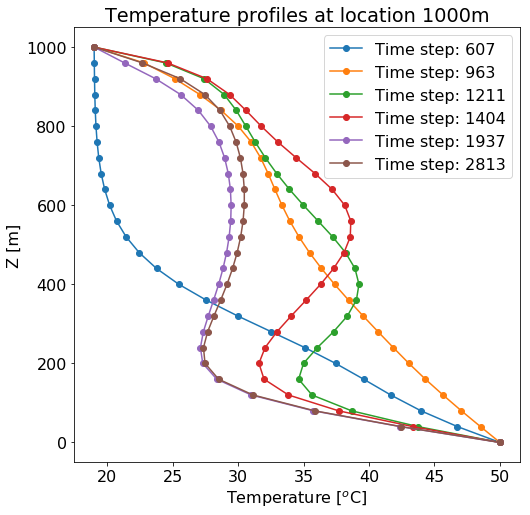

In [21]:
#4 - TH benchmark - static pics
nc = netCDF4.Dataset('Florian_Benchmark/4-TH_2way/gold/TH_2D_small_out_CONVECTION.e')
#Get X and Y coordinates
X = nc.variables['coordx']
Y = nc.variables['coordy']

var2 = nc.variables['vals_nod_var2'] # Temperature var 2, pressure var 1
tstep=[14,21,25,28,39,50]
tname=["607", "963", "1211", "1404", "1937","2813"]
#fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 8))
for i,t in enumerate(tstep):
    '''f,ax = plt.subplots(1, 1, figsize=(10, 5))
    im = plt.scatter(X, Y, c=var2[t,:], marker='s', s=80)
    ax.set_xlabel("X [m]")
    ax.set_ylabel("Z [m]")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label("Temperature [$^o$C]")
    ax.set_aspect('equal')
    plt.savefig("python_figures/4_TH_"+tname[i]+"years.eps")'''
    #Get profiles along several timesteps in the middle of the model (1000m):
    vars_im = resort_results(X, Y, var2, t)
    plt_prof=ax2.plot(vars_im[:,25], yvals,  'o-', label="Time step: " +tname[i])

yvals = np.sort(np.unique(Y)) # extract y-values for correct axis labeling
#ax.get_xaxis().get_label()
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)
#fig2.legend(ax2.get_legend())
ax2.set_xlabel('Temperature [$^o$C]')
ax2.set_ylabel('Z [m]')
ax2.set_title('Temperature profiles at location 1000m')
fig2.savefig("python_figures/4_TH_all_years_profile.eps")
    

In [19]:
print(vars_im.shape)

(26, 51)


## 1- Heat conduction benchmark

/Users/guilherme/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


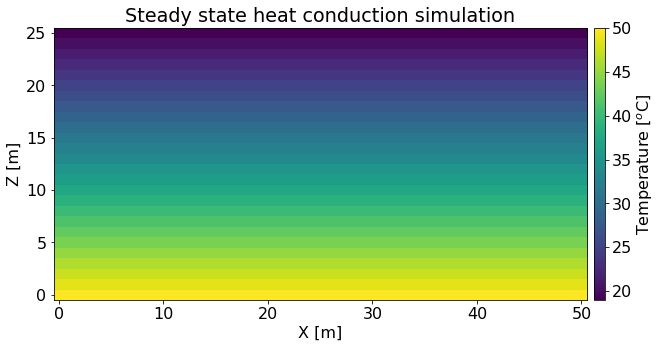

In [57]:
# Steady state
nc = netCDF4.Dataset('Florian_Benchmark/1-T/gold/T_2D_steady.e')
#Get X and Y coordinates
X = nc.variables['coordx']
Y = nc.variables['coordy']
yvals = np.sort(np.unique(Y))
var2 = nc.variables['vals_nod_var2'] 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vars_im = resort_results(X, Y, var2, -1)
im=plt.imshow(vars_im, origin='lower left')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]')
ax.set_title('Steady state heat conduction simulation')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.1)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("Temperature [$^o$C]") #[$^o$C] [Pa]
ax.set_aspect('equal')
fig.savefig("python_figures/T_2D_steady.eps")


/Users/guilherme/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


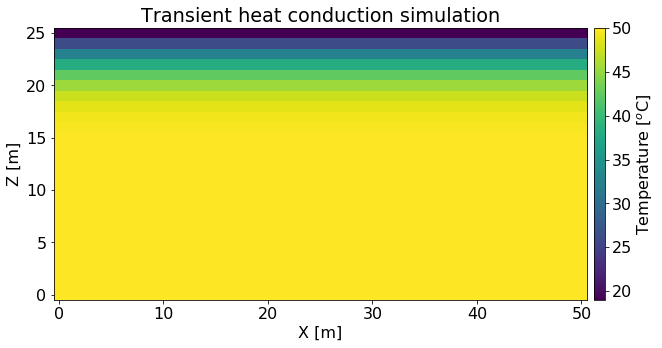

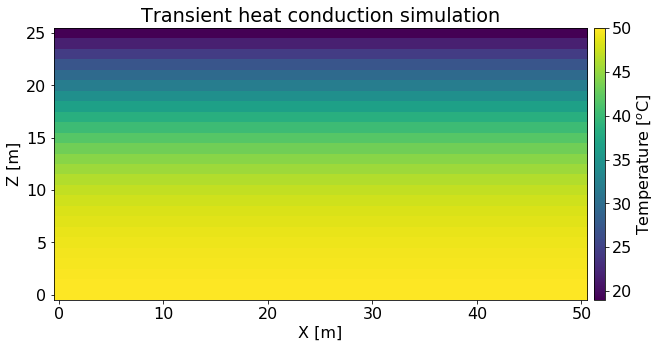

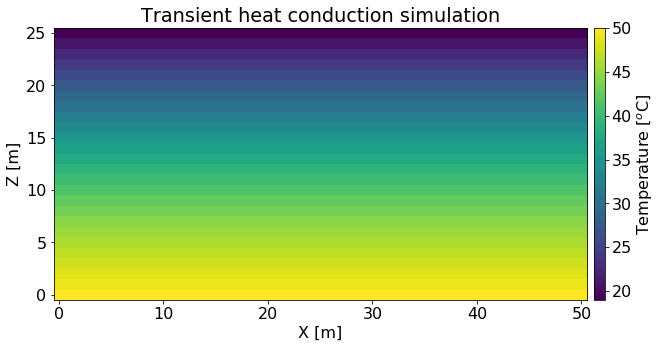

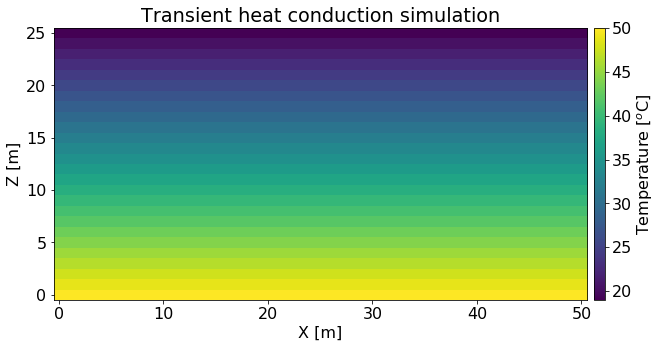

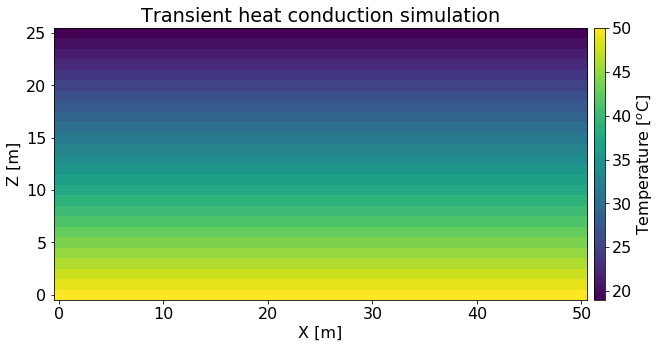

In [52]:
# Transient heat conduction
nc = netCDF4.Dataset('Florian_Benchmark/1-T/gold/T_transient_2D_small_ic50.e')
#Get X and Y coordinates
X = nc.variables['coordx']
Y = nc.variables['coordy']
yvals = np.sort(np.unique(Y))
var2 = nc.variables['vals_nod_var2'] # Temperature var 2, pressure var 1
tstep =[3, 20, 50,100,150]
tname=["300", "2000", "5000", "10000","15000"]
for i,t in enumerate(tstep):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    vars_im = resort_results(X, Y, var2, t)
    im=plt.imshow(vars_im, origin='lower left')
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Z [m]')
    ax.set_title('Transient heat conduction simulation')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label("Temperature [$^o$C]") #[$^o$C] [Pa]
    ax.set_aspect('equal')
    fig.savefig("python_figures/T_transient_"+tname[i]+"years.eps")

### Analytical solution vs numerical simulations

/Users/guilherme/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


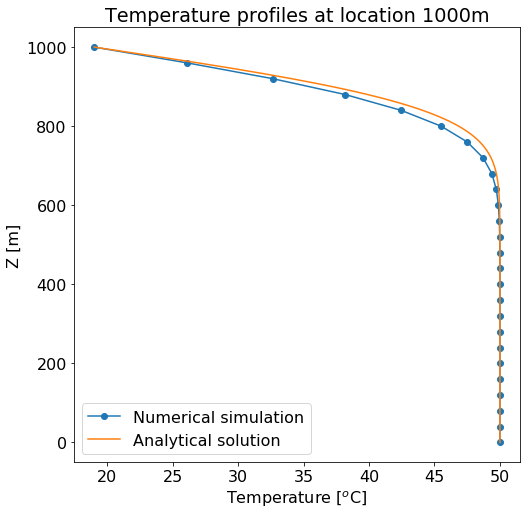

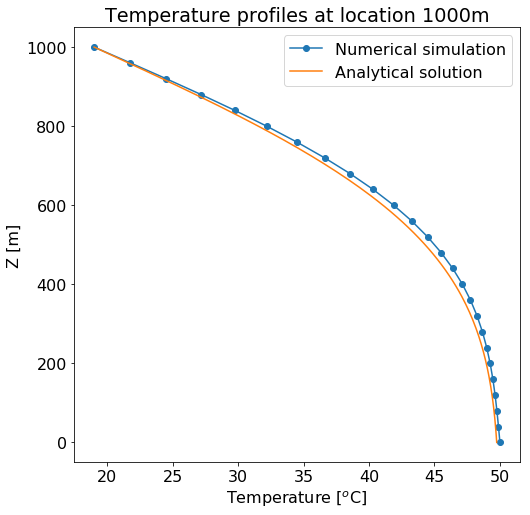

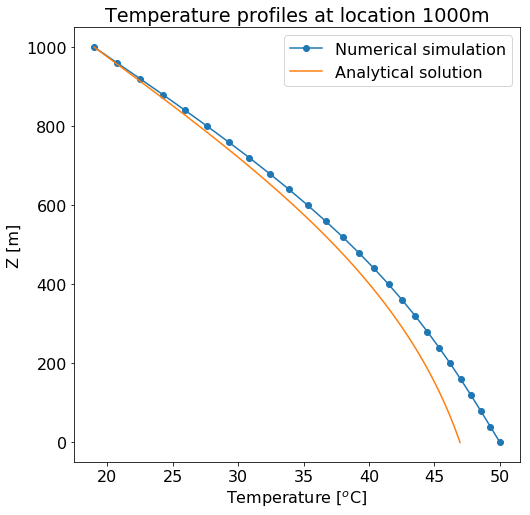

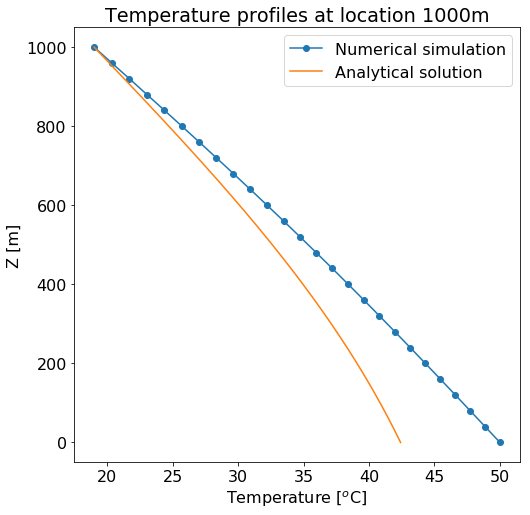

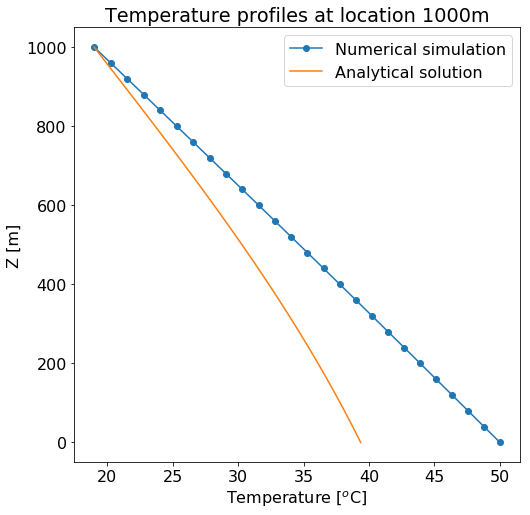

In [46]:
#Paramaters for the analytical solution
K=2.7/(2480*920) # thermal diffusivity K of solid= thermal conducitivity / (density* heat capacity)
#K=0.64/(4180*999.526088)
time= np.arange(0.1,150*3.15576e09,3.15576e09)
y=np.linspace(0,1000,150)

T0=19 # surface
T1= 50 #bottom
#T_anal = (T0-T1)*erfc(y/(2*np.sqrt(t[30]*K))) + T1
# temperature profiles vs analytical solution
tstep =[3, 20, 50,100,150]
tname=["300", "2000", "5000", "10000","15000"]
for i,t in enumerate(tstep):
    T_anal = (T0-T1)*erfc(y/(2*np.sqrt(time[t-1]*K))) + T1
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    vars_im = resort_results(X, Y, var2, t)
    plt.plot(vars_im[:,25], yvals,  'o-', label="Numerical simulation")
    plt.plot(T_anal,y[::-1], label="Analytical solution" )
    ax.set_xlabel('Temperature [$^o$C]')
    ax.set_ylabel('Z [m]')
    ax.set_title('Temperature profiles at location 1000m')
    plt.legend()
    fig.savefig("python_figures/T_2D_small_transient_"+tname[i]+"years_analVSsim.eps")


## 2 - Pressure benchmark

/Users/guilherme/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


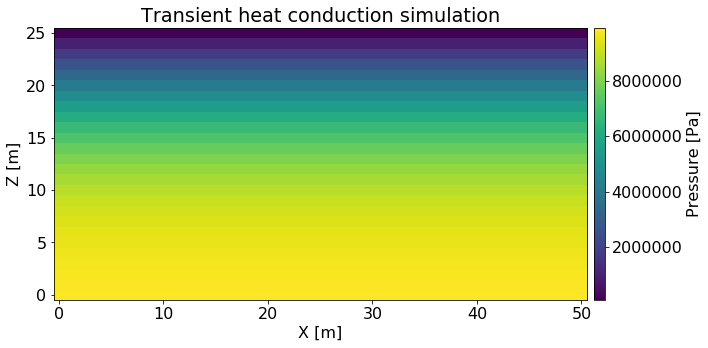

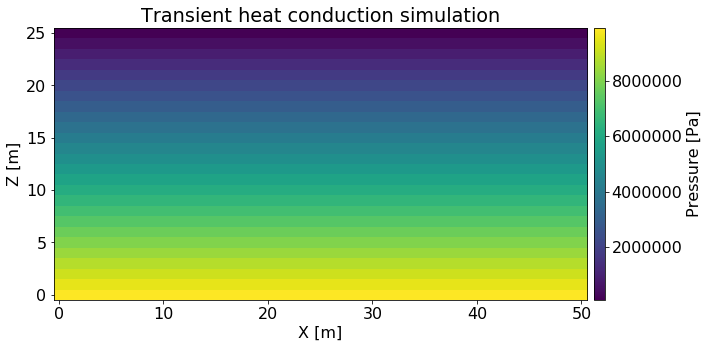

In [54]:
# Model snapshots
nc = netCDF4.Dataset('Florian_Benchmark/2-H/gold/H_transient_2D_small_icHigh.e')
#Get X and Y coordinates
X = nc.variables['coordx']
Y = nc.variables['coordy']
yvals = np.sort(np.unique(Y))
var2 = nc.variables['vals_nod_var1'] # Temperature var 2, pressure var 1
tstep =[14, 72]
tname=["7", "36"]
for i,t in enumerate(tstep):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    vars_im = resort_results(X, Y, var2, t)
    im=plt.imshow(vars_im, origin='lower left')
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Z [m]')
    ax.set_title('Transient heat conduction simulation')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label("Pressure [Pa]") #[$^o$C] [Pa]
    ax.set_aspect('equal')
    fig.savefig("python_figures/H_transient_"+tname[i]+"days.eps")

### Analytical vs simulated

/Users/guilherme/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


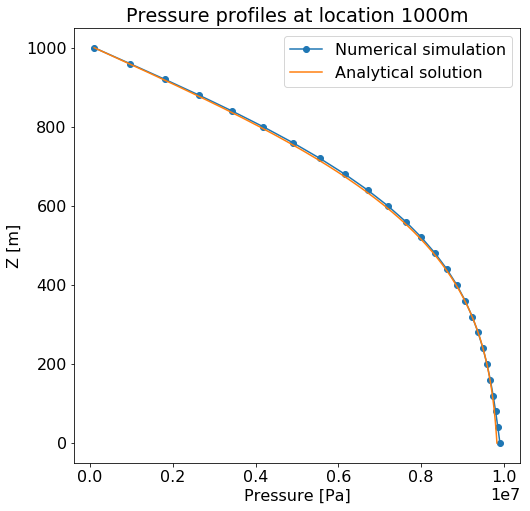

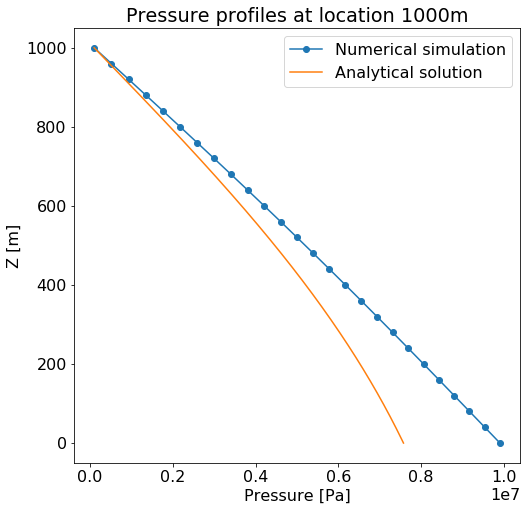

In [55]:
tstep =[14, 72]
tname=["7", "36"]
# Parameter for the analytical solution
fluid_modulus=14285714.29
fluid_viscosity = 0.0012389
fluid_density = 999.526088
solid_density = 2480
permeability = 1.0e-12
porosity=0.1
K=(permeability*fluid_modulus)/(porosity*fluid_viscosity) # pressure diffusivity 
t= np.arange(0.1,100*31557,31557)
y=np.linspace(0,1000,300)
P0=101325 # surface
P1=9.90333e6 #bottom
time=[604800,3110400]
for i,t in enumerate(tstep):
    p_anal = (P0-P1)*erfc(y/(2*np.sqrt(time[i]*K))) + P1
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    vars_im = resort_results(X, Y, var2, t)
    plt.plot(vars_im[:,25], yvals,  'o-', label="Numerical simulation")
    plt.plot(p_anal,y[::-1], label="Analytical solution" )
    ax.set_xlabel('Pressure [Pa]')
    ax.set_ylabel('Z [m]')
    ax.set_title('Pressure profiles at location 1000m')
    plt.legend()
    fig.savefig("python_figures/H_2D_small_transient_"+tname[i]+"days_analVSsim.eps")

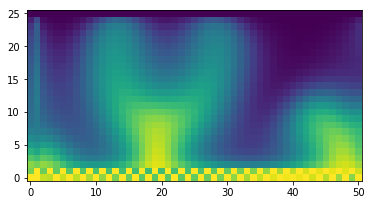

In [86]:
plt.imshow(var_image, origin='lower left')

Re-sort data into appropriate structure

In [91]:
var2_image = np.empty((51,26))
for j,y in enumerate(Y):
    for i,x in enumerate(X):
        var2_image[j,i] = var2[25,j*26+i]

IndexError: index 26 is out of bounds for axis 1 with size 26

In [92]:
np.unique(np.array(Y))

array([    0.,    40.,    80.,   120.,   160.,   200.,   240.,   280.,
         320.,   360.,   400.,   440.,   480.,   520.,   560.,   600.,
         640.,   680.,   720.,   760.,   800.,   840.,   880.,   920.,
         960.,  1000.])